In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext watermark
%watermark -a "Mateus Pereira Barboza"

Author: Mateus Pereira Barboza



>Este  dataset  contém  o  registro  de  um  experimento  clínico  envolvendo  camundongos, com o objetivo de testar a eficácia de diferentes medicamentos no tratamento ou controle do crescimento de tumores. Cada linha do dataset representa uma observação ou medição de um camundongo  em  um  determinado  momento  durante  o  estudo. 

# Análise exploratória

In [3]:
dados = pd.read_csv('dataset.csv')

In [4]:
dados.shape

(500, 8)

In [5]:
dados.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Mouse             500 non-null    object 
 1   Medicamento          500 non-null    object 
 2   Sexo                 500 non-null    object 
 3   Idade_Meses          500 non-null    int64  
 4   Peso (g)             500 non-null    int64  
 5   Timepoint            500 non-null    int64  
 6   Tumor Volume (mm3)   500 non-null    float64
 7   Sitios Metastáticos  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


## Limpeza inicial dos Dados

In [7]:
dados.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [8]:
dados["ID Mouse"].nunique()

100

In [9]:
dados.isna().any()

ID Mouse               False
Medicamento            False
Sexo                   False
Idade_Meses            False
Peso (g)               False
Timepoint              False
Tumor Volume (mm3)     False
Sitios Metastáticos    False
dtype: bool

In [10]:
#Extrai duplicatas na combinação "ID Mouse" e "Timepoint" (se houver)
ID_duplicado = dados.loc[dados.duplicated(subset = ["ID Mouse", "Timepoint"]), "ID Mouse"].unique()

#Removendo duplicadas de ID
dados = dados[dados["ID Mouse"].isin(ID_duplicado) == False]

In [11]:
dados.shape

(500, 8)

## Sumário Estatístico

In [12]:
# Agrupamento pelo Medicamento e filtro pela variável "Tumor Volume (mm3)"
dados_group = dados.groupby("Medicamento")["Tumor Volume (mm3)"]

In [13]:
#Calculos estatísticos
media = dados_group.mean()
mediana = dados_group.median()
variancia = dados_group.var()
desvio_p = dados_group.std()
sem = dados_group.sem()

In [14]:
#Sumário
dados_sumario = pd.DataFrame({"Média": media,
                                "Mediana": mediana,
                                "Variância": variancia,
                                "Desvio Padrão": desvio_p,
                                "SEM": sem})

In [15]:
dados_sumario

,Média,Mediana,Variância,Desvio Padrão,SEM
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


In [16]:
#Alternativa para sumário
dados_sumario2 = dados_group.agg(["mean", "median", "var", "std", "sem"])

In [17]:
dados_sumario2

,mean,median,var,std,sem
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


## Análise exploratória com gráfico

In [18]:
#Registro por Medicamento
dados['Medicamento'].value_counts()

Medicamento
Ramicane     133
Placebo      126
Capomulin    124
Infubinol    117
Name: count, dtype: int64

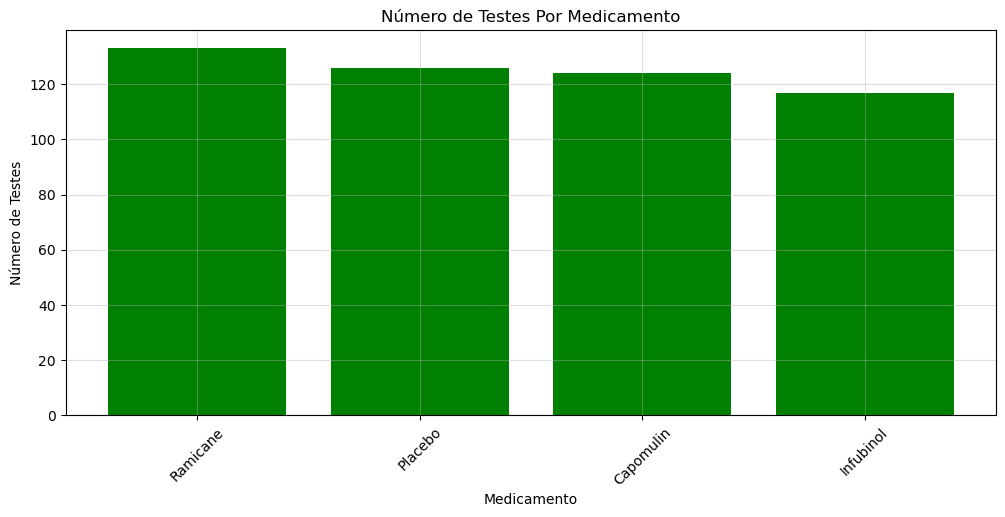

In [19]:
# Número de Testes por Medicamento
plt.figure(figsize = (12,5))
x_axis = dados['Medicamento'].value_counts().index.values
y_axis = dados['Medicamento'].value_counts().values
plt.bar(x_axis, y_axis, color = "Green")
plt.title("Número de Testes Por Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Número de Testes")
plt.grid(alpha = 0.4)
plt.xticks(rotation = 45)
plt.show()

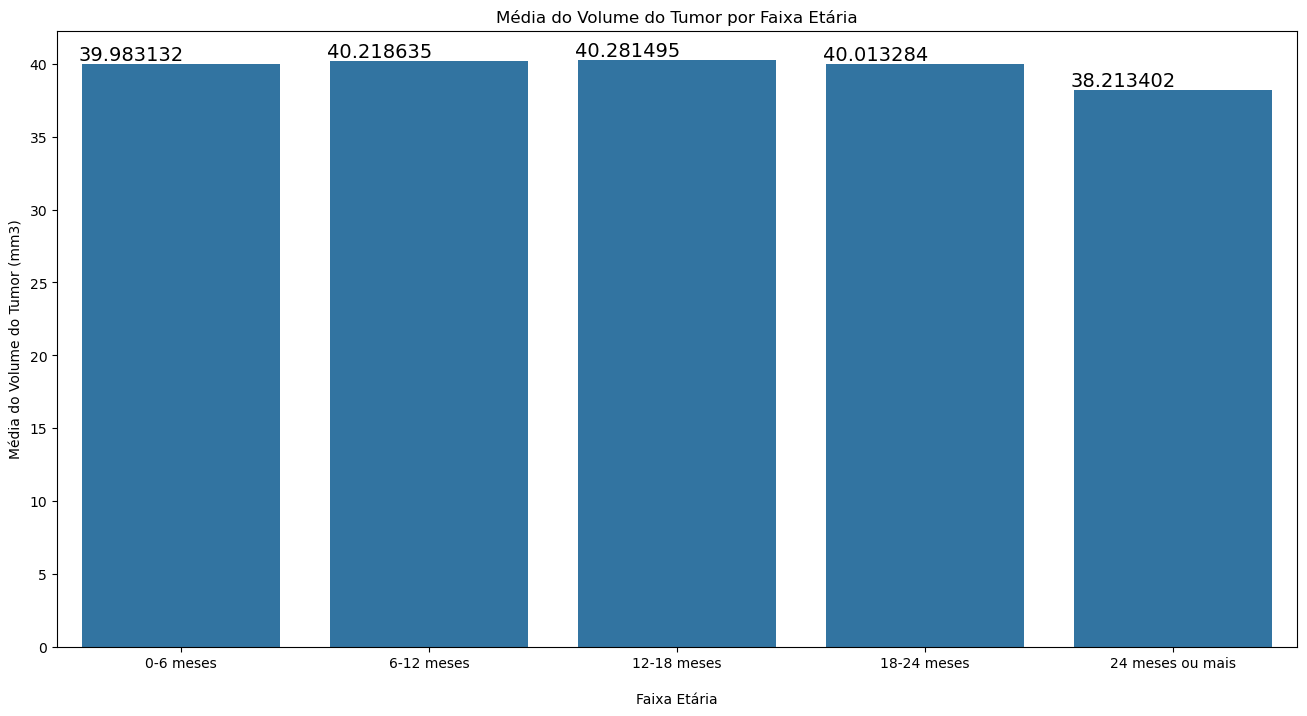

In [20]:
# Média do Volume do Tumor por Faixa Etária

#Faixas etárias
bins = [0, 6, 12, 18, 24, 30]
labels = ['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24 meses ou mais']

#Divide as faixas
dados['faixa_etaria'] = pd.cut(dados['Idade_Meses'],
                               bins = bins,
                               labels = labels,
                               right = False)

#Média por Faixa etária
media_tumor = dados.groupby('faixa_etaria')['Tumor Volume (mm3)'].mean().reset_index()

#Criando o gráfico
import seaborn as sns
plt.figure(figsize = (16,8))
fig = sns.barplot(x = 'faixa_etaria', y = 'Tumor Volume (mm3)', data = media_tumor)
plt.title('Média do Volume do Tumor por Faixa Etária')
plt.xlabel('\nFaixa Etária')
plt.ylabel('Média do Volume do Tumor (mm3)')

for p in fig.patches:
    fig.annotate('{:0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

plt.show()

In [21]:
dados.groupby('faixa_etaria')['Tumor Volume (mm3)'].mean().reset_index()

,faixa_etaria,Tumor Volume (mm3)
0,0-6 meses,39.983132
1,6-12 meses,40.218635
2,12-18 meses,40.281495
3,18-24 meses,40.013284
4,24 meses ou mais,38.213402


## Quartis, Outliers e Boxplots

Quartis são valores que dividem um conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que separa os 25% menores dados dos demais, o segundo quartil (Q2) ou mediana divide os dados ao meio, e o terceiro quartil (Q3) separa os 75% menores dados dos 25% maiores.


Outliers ou valores atípicos são observações que se distanciam significativamente dos outros dados do conjunto. Eles podem ser resultado de variabilidade nos dados ou de erros de medição. São importantes porque podem distorcer estatísticas e proporcionar insights sobre anomalias.

Um boxplot é um método gráfico para representar a distribuição de dados numéricos por meio de quartis. Ele mostra o mínimo, o primeiro quartil (Q1), a mediana (Q2), o terceiro quartil (Q3) e o máximo, com linhas (chamadas de "bigodes" ou whiskers) que se estendem para mostrar a variabilidade fora dos quartis. Outliers são frequentemente indicados como pontos individuais que ficam fora dos "bigodes".

In [22]:
Medicamentos = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

medicamentos_df = {}

for i in Medicamentos:
    serie = dados.loc[dados['Medicamento'] == i,:]
    medicamentos_df[i] = serie

In [23]:
#Obtendo o último tratamento de cada cobaia
Capomulin_last = medicamentos_df['Capomulin'].groupby("ID Mouse").max()['Timepoint']

In [24]:
Capomulin_df = pd.DataFrame(Capomulin_last)

In [25]:
Capomulin_merge = pd.merge(Capomulin_df, medicamentos_df["Capomulin"], on = ("ID Mouse", "Timepoint"), how = "left")

In [26]:
Capomulin_merge

,ID Mouse,Timepoint,Medicamento,Sexo,Idade_Meses,Peso (g),Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,15,Capomulin,Feminino,21,23,38.578206,2,18-24 meses
1,m002,5,Capomulin,Feminino,5,15,42.618402,0,0-6 meses
2,m003,15,Capomulin,Feminino,8,19,38.578974,0,6-12 meses
3,m004,20,Capomulin,Masculino,6,28,39.716441,2,6-12 meses
4,m005,15,Capomulin,Masculino,16,27,40.130019,2,12-18 meses
...,...,...,...,...,...,...,...,...,...
71,m094,10,Capomulin,Feminino,12,11,41.573486,0,12-18 meses
72,m095,20,Capomulin,Masculino,24,16,33.017532,3,24 meses ou mais
73,m096,20,Capomulin,Masculino,24,17,34.511097,1,24 meses ou mais
74,m097,0,Capomulin,Masculino,1,29,40.057265,2,0-6 meses


In [27]:
# Extrai os tumores
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

In [28]:
# Extrai os quartis
Cap_quartiles = Capomulin_tumors.quantile([0.25,0.5,0.75])

In [29]:
Cap_quartiles

0.25    35.587189
0.50    38.585446
0.75    41.078609
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# Separa o primeiro e o terceiro quartil
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]

In [31]:
# IQR
Cap_IQR = Cap_upperq - Cap_lowerq

In [32]:
# Limites (Whiskers)
Cap_lowerbound = Cap_lowerq - (Cap_IQR * 1.5)
Cap_upperbound = Cap_upperq + (Cap_IQR * 1.5)

In [33]:
print(f"Primeiro Quartil da Medida do Tumor com Capomulin: {Cap_lowerq}")
print(f"Terceiro Quartil da Medida do Tumor com Capomulin: {Cap_upperq}")
print(f"Intervalo Interquartil (IQR): {Cap_IQR}")
print(f"Valores Abaixo de {Cap_lowerbound} podem ser outliers")
print(f"Valores Acima de {Cap_upperbound} podem ser outliers")

Primeiro Quartil da Medida do Tumor com Capomulin: 35.58718855604685
Terceiro Quartil da Medida do Tumor com Capomulin: 41.07860879053021
Intervalo Interquartil (IQR): 5.491420234483364
Valores Abaixo de 27.3500582043218 podem ser outliers
Valores Acima de 49.315739142255254 podem ser outliers


### Apartir daqui, irei "automatizar" o processo para os medicamentos, em vista que, o exemplo acima é apenas para elucidar a regra por trás de cada Outlier

In [34]:
# Extraindo o último tratamento de cada cobaia
last_timepoint = pd.DataFrame(dados.groupby("ID Mouse")["Timepoint"].max().sort_values()) \
                .reset_index().rename(columns = {"Timepoint": "Ultimo Tratamento"})

In [35]:
last_timepoint.head()

,ID Mouse,Ultimo Tratamento
0,m000,20
1,m072,20
2,m071,20
3,m070,20
4,m069,20


In [36]:
# Adiciona o último timepoint como uma coluna no dataframe original
merged_df = pd.merge(dados, last_timepoint, on = "ID Mouse")

In [37]:
merged_df

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria,Ultimo Tratamento
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses,20
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais,20
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,18-24 meses,20
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses,20
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,12-18 meses,20
...,...,...,...,...,...,...,...,...,...,...
495,m099,Placebo,Feminino,19,29,0,40.746550,2,18-24 meses,20
496,m099,Infubinol,Masculino,3,19,5,41.191849,2,0-6 meses,20
497,m099,Ramicane,Masculino,15,16,10,41.715409,0,12-18 meses,20
498,m099,Placebo,Masculino,14,19,15,34.176424,2,12-18 meses,20


In [38]:
# Lista para o volume do tumor
tumor_volume = []

In [39]:
# Lista de Tratamentos
lista_med = ["Capomulin", "Ramicane", "Infubinol", "Placebo"]

## Pergunta 1 - Há outliers em cada Tratamento ?

In [40]:
print(f"\nRelatório Estatítisco de Outliers")

for medicamento in lista_med:

    # Filtra o df apenas com o medicamento na iteração
    df = merged_df.loc[merged_df["Medicamento"] == medicamento]

    #Localiza os dados do volume final do tumor no último ponto de tempo registrado para o medicamento
    final_volume = df.loc[df['Timepoint'] == df['Ultimo Tratamento']]

    #Seleciona a coluna de volume do tumor dos dados filtrados
    final_volumes = final_volume['Tumor Volume (mm3)']

    # Adiciona os volumes finais de tumor à lista de volumes de tumor
    tumor_volume.append(final_volumes)

    #Calcula os quartis para os volumes finais do tumor
    quartiles = final_volumes.quantile([0.25, .5, 0.75])

    #Atribui o primeiro quartil à variável lowerq
    lowerq = quartiles[0.25]

    #Atribui o terceiro quartil à variável upperq
    upperq = quartiles[0.75]

    # Calcula o intervelo interquartil (IQR)
    iqr = upperq - lowerq

    #Calcula o limite inferior para detecção de outliers
    lower_bound = lowerq - (1.5 * iqr)

    #Calcula o olimite superior para detecçção de outliers
    upper_bound = upperq + (1.5 * iqr)

    #Conta os outliers com base nos limites definidos
    outliers = final_volumes[(final_volume['Tumor Volume (mm3)'] <= lower_bound) | \
                             (final_volume['Tumor Volume (mm3)'] >= upper_bound)].count()

    #Imprime
    print(f'\nIQR para {medicamento}: {iqr}')
    print(f"Limite Inferior para {medicamento}: {lower_bound}")
    print(f"Limite Superior para {medicamento}: {upper_bound}")
    print(f"Medicamento: {medicamento} -> Número de outliers: {outliers}")
    


Relatório Estatítisco de Outliers

IQR para Capomulin: 4.852178469471447
Limite Inferior para Capomulin: 25.767389137683136
Limite Superior para Capomulin: 45.17610301556893
Medicamento: Capomulin -> Número de outliers: 0

IQR para Ramicane: 5.003897167188235
Limite Inferior para Ramicane: 26.055360480530023
Limite Superior para Ramicane: 46.07094914928297
Medicamento: Ramicane -> Número de outliers: 0

IQR para Infubinol: 3.8793474601479048
Limite Inferior para Infubinol: 26.74425645494983
Limite Superior para Infubinol: 42.26164629554145
Medicamento: Infubinol -> Número de outliers: 0

IQR para Placebo: 5.16298824225909
Limite Inferior para Placebo: 24.757630535846673
Limite Superior para Placebo: 45.40958350488303
Medicamento: Placebo -> Número de outliers: 0


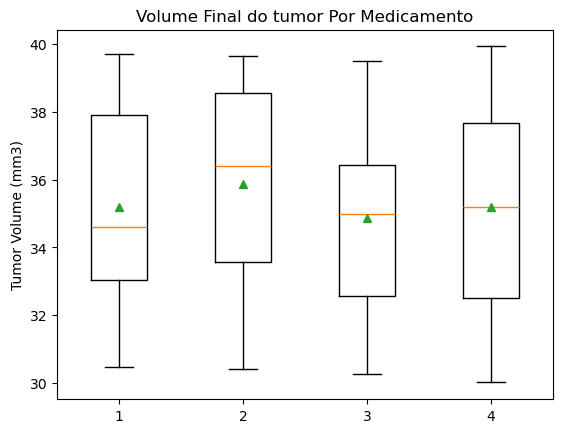

In [42]:
#Boxplot
format = dict(marker = "o")
plt.boxplot(tumor_volume, flierprops = format, showmeans = True)
plt.title("Volume Final do tumor Por Medicamento")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Placebo"])
plt.show()

## Pergunta 2 - Com o Uso de Medicamentos Há Efeito no Volume do Tumor Ao Longo do Tempo?

In [43]:
#Extrai os dados de uma cobaia
tratamento_mouse = dados.loc[dados['ID Mouse'] == 'm000']

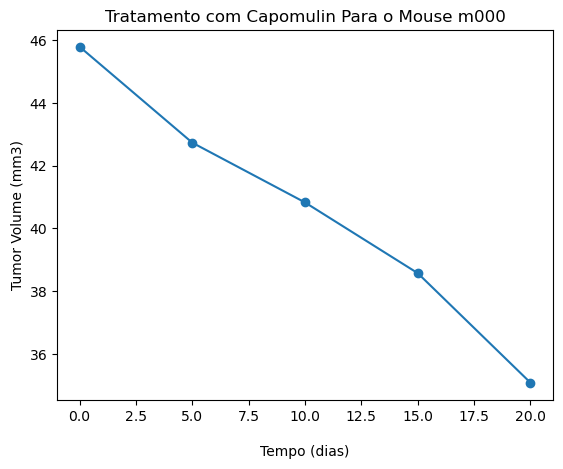

In [44]:
#Plot
plt.plot(tratamento_mouse['Timepoint'], tratamento_mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('\nTempo (dias)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tratamento com Capomulin Para o Mouse m000')
plt.show()

>
>Notoriamente nós vemos que com base nesta cobaia, há efeito do medicamento ao longo do tempo

## Pergunta 3 - Para Um dos Medicamentos Qual a Relação Entre Peso da Cobaia e Tamanho do Tumor?

In [45]:
# Filtra os dados
capomulin_tratamento = dados.loc[dados['Medicamento'] == 'Capomulin']

In [46]:
capomulin_tratamento.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [47]:
capomulin_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 3 to 494
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Mouse             124 non-null    object  
 1   Medicamento          124 non-null    object  
 2   Sexo                 124 non-null    object  
 3   Idade_Meses          124 non-null    int64   
 4   Peso (g)             124 non-null    int64   
 5   Timepoint            124 non-null    int64   
 6   Tumor Volume (mm3)   124 non-null    float64 
 7   Sitios Metastáticos  124 non-null    int64   
 8   faixa_etaria         124 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 9.0+ KB


In [48]:
#Média das colunas numéricas
avg_tumor_volume = capomulin_tratamento.groupby('ID Mouse')[['Idade_Meses',
                                                             'Peso (g)',
                                                             'Timepoint',
                                                             'Tumor Volume (mm3)',
                                                             'Sitios Metastáticos']].mean()

In [49]:
avg_tumor_volume.head()

,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
ID Mouse,,,,,
m000,21.0,23.0,15.0,38.578206,2.0
m002,5.0,15.0,5.0,42.618402,0.0
m003,8.0,19.0,15.0,38.578974,0.0
m004,6.0,28.0,20.0,39.716441,2.0
m005,16.0,27.0,15.0,40.130019,2.0


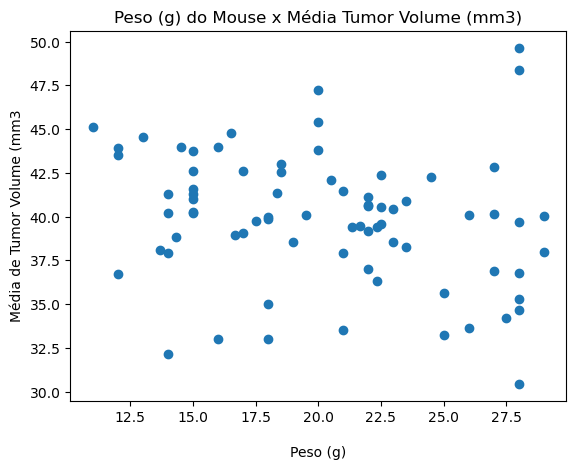

In [50]:
#Scatter Plot
x_values = avg_tumor_volume['Peso (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.title('Peso (g) do Mouse x Média Tumor Volume (mm3)')
plt.xlabel('\nPeso (g)')
plt.ylabel('Média de Tumor Volume (mm3')
plt.show()

> Aparenta ter uma correlação negativa - Quanto menor o Tumor, Maior o Peso

In [51]:
#Calcula a correlação
correlacao = st.pearsonr(avg_tumor_volume['Peso (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f'A correlação entre Peso (g) e Tumor Volume (mm3) é de {round(correlacao[0],2)}')

A correlação entre Peso (g) e Tumor Volume (mm3) é de -0.22


In [52]:
correlacao

PearsonRResult(statistic=-0.21858785932842079, pvalue=0.057823621843328545)

> Coeficiente de Pearson comprovando que há uma pequena correlação negativa

## Quantificando e Prevendo a Relação Através de Regressão Linear

Regressão Linear é um método estatístico usado para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. O objetivo é encontrar uma linha reta que melhor se ajuste aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha de regressão. Em outras palavras, busca-se descrever como a variável de interesse responde à mudança das outras variáveis.


In [55]:
#Modelo de Regressão
modelo = st.linregress(avg_tumor_volume['Peso (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

In [56]:
modelo.intercept

43.1616906149073

In [58]:
modelo.slope

-0.16303360099718336

Formula da Regressão Linear Simples

y = β0 + β1x
• y é a variável dependente que estamos tentando prever ou explicar.
• x é a variável independente usada para prever y.
• β0 é o intercepto da reta, representando o valor esperado de y quanto x é igual a zero.
• β1 é o coeficiente da variável independente (também chamado slope), indicando a mudança esperada em y para uma umento de uma unidade em x.

In [60]:
# Cria a fórmula de regressão com os coeficientes encontrados
modelo_reg = modelo.intercept + modelo.slope * avg_tumor_volume['Peso (g)']

In [61]:
# Calcula a linha de regressão
line_equation = f'y={round(modelo.slope,2)}x + {round(modelo.intercept,2)}'

In [62]:
line_equation

'y=-0.16x + 43.16'

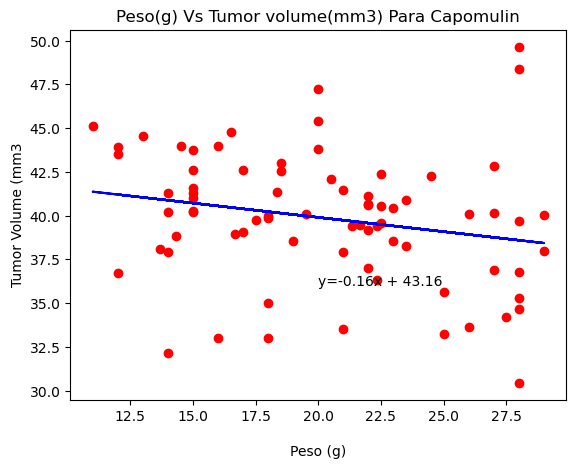

In [71]:
# Plot
plt.scatter(avg_tumor_volume['Peso (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color = 'r')
plt.plot(avg_tumor_volume['Peso (g)'], modelo_reg, color = 'blue')
plt.xlabel('\nPeso (g)')
plt.ylabel('Tumor Volume (mm3')
plt.title('Peso(g) Vs Tumor volume(mm3) Para Capomulin')
plt.annotate(line_equation, (20,36))
plt.show()

Há uma relação negativa entre as variáveis. Isso significa que à medida que o volume do tumor diminui, aumenta o peso da cobaia (mouse). Ou seja, quanto menor o tumor, maior o potencial de ganho de peso da cobaia, possivelmente devido à melhora da saúde ou outras condições relacionadas.

In [73]:
%watermark -a "Mateus Pereira Barboza"

Author: Mateus Pereira Barboza

